In [1]:
!pip install xgboost nltk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier

nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
data = pd.read_csv("/content/Reviews.csv")
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
data = data[['Text','Score']]


In [20]:
data = data[data['Score'] != 3]

data['Sentiment'] = data['Score'].apply(
    lambda x: 1 if x > 3 else 0
)


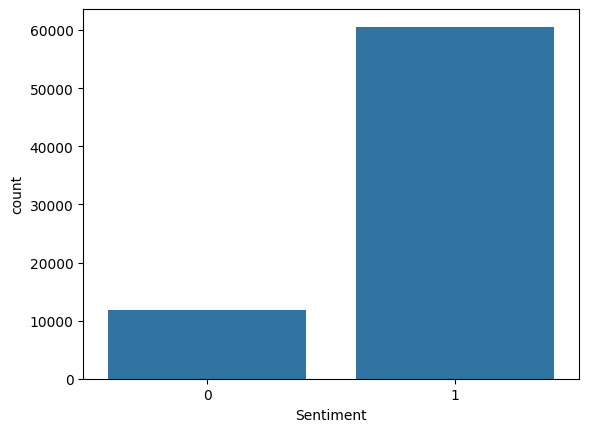

In [21]:
sns.countplot(x='Sentiment', data=data)
plt.show()


In [23]:
data['Text'] = data['Text'].fillna("")


In [24]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

data['Clean_Text'] = data['Text'].apply(clean_text)


In [25]:
X = data['Clean_Text']
y = data['Sentiment']


In [26]:
tfidf = TfidfVectorizer(max_features=5000)
X_vec = tfidf.fit_transform(X)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)


In [28]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss'
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
y_pred = model.predict(X_test)


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9050812305565157
[[ 1124  1232]
 [  141 11968]]
              precision    recall  f1-score   support

           0       0.89      0.48      0.62      2356
           1       0.91      0.99      0.95     12109

    accuracy                           0.91     14465
   macro avg       0.90      0.73      0.78     14465
weighted avg       0.90      0.91      0.89     14465



In [31]:
def predict_review(review):
    review = clean_text(review)
    review_vec = tfidf.transform([review])
    pred = model.predict(review_vec)[0]
    return "Positive" if pred==1 else "Negative"

predict_review("Product is excellent and tasty")


'Positive'

In [32]:
predict_review("Product is poor")

'Negative'

# New Section